In [166]:
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC
from Bio import SeqIO
from Bio import AlignIO
from pandas import DataFrame
import pandas as pd
import os, sys
from tqdm import tqdm_notebook

In [167]:
def find_rRNA(filename):
    rRNAs = []
    handle = open(filename)
    for seq_record in SeqIO.parse(filename, "genbank"):
        for gene in seq_record.features:
            if gene.type=="rRNA":
                if 'product' in gene.qualifiers:
                    if '16S' in gene.qualifiers['product'][0]:
                        start = gene.location.nofuzzy_start
                        end = gene.location.nofuzzy_end
                        if 'db_xref' in gene.qualifiers:
                            gi=[]
                            gi=str(gene.qualifiers['db_xref'])
                            gi=gi.split(":")[1]
                            gi=gi.split("'")[0]
                            #print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,seq_record.description,seq_record.seq[start:end]))
                            #record = SeqRecord(Seq_record.seq[start:end], id = "Id|%s|GeneId|%s|16S rRNA|%s" % (seq_record.id, gi, seq_record.description))
                            record = SeqRecord(seq_record.seq[start:end], id = "%s |%s |%s" % (seq_record.id, seq_record.annotations["organism"], seq_record.annotations["taxonomy"]))
                            rRNAs.append(record)
                        else:
                            #print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (seq_record.description,seq_record.seq[start:end]))
                            #record = SeqRecord(seq_record.seq[start:end], id = "Id|%s|GeneId|NoGenID|16S rRNA|%s" % (seq_record.id, seq_record.description))
                            record = SeqRecord(seq_record.seq[start:end], id = "%s |%s |%s" % (seq_record.id, seq_record.annotations["organism"], seq_record.annotations["taxonomy"]))
                            rRNAs.append(record)
    return rRNAs

In [168]:
"""
__author__ = 'M. Chimal & Pauley'
Fis Manuel Chimal, Instituto de Ciencias Nucleares,UNAM, mjchimal@gmail.com
MSc Paulina Ponfifes, Facultad de Ciencias, UNAM, pontifes.pa@gmail.com
"""
"""
This script drops duplicate sequence records in a fasta file, keeping only unique records. 
Uses Biopy modules 
"""

def drop_duplicates_fasta(f_fasta,unique=False,separator='&'):
    """
    Drops duplicate sequence records in a fasta file, keeping only unique records
    Parametes
    ---------
    f_fasta : str
    fasta file name
    unique  : bool
    True  := drop duplicate sequence records
    False := creates unique ids for all records
    separator: str
    if user sets "unique" argument to True, it will add an & + index (by default) to all records. This makes every
    record unique
    Output
    fasta file  
    """
    if unique == False:
        d_seq = {record.id:record for record in SeqIO.parse(f_fasta,'fasta')}
        pass
    elif unique == True:
        d_seq  ={'%s%s%i'%(record.id.strip(),separator,i):record for i,record in enumerate(SeqIO.parse(f_fasta,'fasta'))}
        pass 
    SeqIO.write([SeqRecord(record.seq ,id=record.id,name=record.name,description=record.description) for key,record in d_seq.items()],'%s_clean'%(f_fasta),'fasta')
    print ("It's done")
    return 1

In [184]:
#os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
cwd = os.getcwd()
id = pd.read_csv('02_NCBI_Result_WGS.csv')
for i in tqdm_notebook(range(len(id))):    
    try:
        genus = id.loc[i, "Genus"]
        species = id.loc[i, "Species"]
        refseq = pd.read_csv('Refseq_'+genus+'_'+species+'.csv')
        os.chdir(cwd+"/Result/"+genus+" "+species)
        #_______________________________________________________
        cwd2 = (os.getcwd())
        result = os.listdir()
        for z in range(len(result)):
            #print(result[z])
            if 'bacteria' in result[z]:
                os.chdir(result[z]+"/input/")
                #___________________________________________________
                dir_ref = os.listdir()
                for y in range(len(dir_ref)):
                    if '.gbk' in dir_ref[y]:
                        print (dir_ref[y])
                        rRNA = find_rRNA(dir_ref[y])
                        #print(rRNA)
                        os.chdir(cwd2)
                        #____________________________________________
                        SeqIO.write(rRNA, '16s_'+dir_ref[y]+'.fasta', 'fasta')
                #print('_____________________________________________')
                os.chdir(cwd2)
                print(os.getcwd())
            os.chdir(cwd2)
        os.chdir(cwd)
    except OSError:
        print('ERROR_'+genus+' '+species)
        os.chdir(cwd)
        #pass

NC_017534.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NC_017535.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NC_006085.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NC_017550.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NC_014039.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
NZ_CP020463.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NC_004461.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NC_002976.3.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NZ_HG813242.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NZ_CP009046.1.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
NZ_AP014956.1.gbk
E:\Jupyter_

In [185]:
#os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
cwd = os.getcwd()
id = pd.read_csv('02_NCBI_Result_WGS.csv')
for i in tqdm_notebook(range(len(id))):    
    try:
        genus = id.loc[i, "Genus"]
        species = id.loc[i, "Species"]
        refseq = pd.read_csv('Refseq_'+genus+'_'+species+'.csv')
        os.chdir(cwd+"/Result/"+genus+" "+species)
        #_______________________________________________________
        cwd2 = (os.getcwd())
        result = os.listdir()
        for z in range(len(result)):
            #print(result[z])
            if '.gbk.fasta' in result[z]:
                print(result[z])
                os.chdir(cwd2)
                print(os.getcwd())
            os.chdir(cwd2)
        os.chdir(cwd)
    except OSError:
        print('ERROR_'+genus+' '+species)
        os.chdir(cwd)
        #pass

16s_NC_006085.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_014039.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_017534.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_017535.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_017550.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_002976.3.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
16s_NC_004461.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
16s_NC_012704.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
16s_NZ_CP009046.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
16s_NZ_CP020463.1.gbk.fasta
E:\Jupyter_Lab\

In [179]:
#os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
cwd = os.getcwd()
id = pd.read_csv('02_NCBI_Result_WGS.csv')
for i in tqdm_notebook(range(len(id))):    
    try:
        genus = id.loc[i, "Genus"]
        species = id.loc[i, "Species"]
        refseq = pd.read_csv('Refseq_'+genus+'_'+species+'.csv')
        os.chdir(cwd+"/Result/"+genus+" "+species)
        #_______________________________________________________
        cwd2 = (os.getcwd())
        result = os.listdir()
        for z in range(len(result)):
            if '16s' in result[z]:
                #os.chdir(result[z]+"/input/")
                #___________________________________________________
                dir_ref = os.listdir()
                print(result[z])
                #os.chdir(cwd2)
                print(os.getcwd())
            #os.chdir(cwd2)
        os.chdir(cwd)
    except OSError:
        print('ERROR_'+genus+' '+species)
        os.chdir(cwd)
        #pass

SyntaxError: can't assign to literal (<ipython-input-179-342b0e19c321>, line 14)

In [155]:
os.chdir(cwd)
os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
species = pd.read_csv('02_NCBI_Result_WGS.csv')
for i in tqdm_notebook(range(len(species))):
    try:
        refseq = pd.read_csv('Refseq_'+species.loc[i,"Genus"]+'_'+species.loc[i,"Species"]+'.csv')
        os.chdir(cwd+"/Result/"+species.loc[i,"Genus"]+" "+species.loc[i,"Species"]+"/")
        cwd2 = os.getcwd()
        result = os.listdir()
        for x in range(len(result)):
            #print(result[x])
            if 'fasta' in result[x]:
                if 'clean' not in result[x]:
                    print(result[x])
                    print(os.getcwd())
                    #drop_duplicates_fasta(result[x], unique=False, separator='&')
                    os.chdir(cwd2)
                os.chdir(cwd)
            #os.chdir(cwd2)
    except OSError:
        os.chdir(cwd)
        pass

16s_NC_006085.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_014039.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NC_017534.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NC_017535.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NC_017550.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NC_002976.3.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
16s_NC_004461.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NZ_CP009046.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NZ_CP020463.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NZ_HG813242.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI
16s_NZ_CP014634.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium simulans
16s_NZ_CP014635.1.gbk.fasta
E:\Jupyter_Lab\KetiakProject\Genome

In [123]:
os.chdir(cwd)
#os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
species = pd.read_csv('02_NCBI_Result_WGS.csv')
seq = []
for i in tqdm_notebook(range(len(species))):
    try:
        refseq = pd.read_csv('Refseq_'+species.loc[i,"Genus"]+'_'+species.loc[i,"Species"]+'.csv')
        os.chdir(cwd+"/Result/"+species.loc[i,"Genus"]+" "+species.loc[i,"Species"]+"/")
        print(os.getcwd())
        result = os.listdir()
        for x in range(len(result)):
            if '16s' and 'clean' in result[x]:
                print(result[x])
                seq_x = SeqIO.read(result[x],"fasta")
                seq.append(seq_x)
            else:
                pass
        os.chdir(cwd)
    except OSError:
        os.chdir(cwd)
        pass

E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
16s_NC_006085.1.gbk.fasta_clean
16s_NC_014039.1.gbk.fasta_clean
16s_NC_017534.1.gbk.fasta_clean
16s_NC_017535.1.gbk.fasta_clean
16s_NC_017550.1.gbk.fasta_clean
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium tuberculostearicum
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus capitis
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium simulans
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Streptococcus mitis
16s_NC_013853.1.gbk.fasta_clean
16s_NZ_CP012646.1.gbk.fasta_clean
16s_NZ_CP014326.1.gbk.fasta_clean
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus hominis
16s_NZ_CP014107.1.gbk.fasta_clean
16s_NZ_CP020618.1.gbk.fasta_clean
16s_NZ_LT963438.1.gbk.fasta_clean
16s_NZ_LT963442.1.gbk.fasta_clean
E:\Jupyter_Lab\KetiakProject\Gen

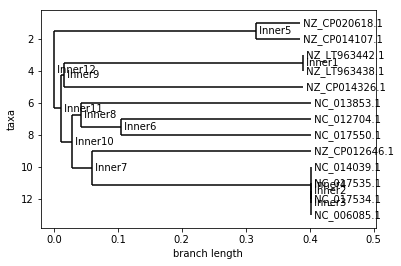

                                                  __________ NZ_CP020618.1
  _______________________________________________|
 |                                               |__________ NZ_CP014107.1
 |
 |                                                          , NZ_LT963442.1
_|  ________________________________________________________|
 |,|                                                        | NZ_LT963438.1
 |||
 |||________________________________________________________ NZ_CP014326.1
 ||
 ||     _______________________________________________________ NC_013853.1
  |   _|
  |  | |          _____________________________________________ NC_012704.1
  |  | |_________|
  |__|           |_____________________________________________ NC_017550.1
     |
     |     ____________________________________________________ NZ_CP012646.1
     |    |
     |____|                                                   , NC_014039.1
          |                                                   |
     

In [97]:
from Bio.Align import MultipleSeqAlignment
from Bio import Seq
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

len_seq = []
for i in range(len(seq)):
    x = len(seq[i])
    len_seq.append(x)
maxlen = max(len_seq)

for i in range(len(seq)):
    if len(seq[i]) != maxlen:
        sequence = str(seq[i].seq).ljust(maxlen, '.')
        seq[i].seq = Seq.Seq(sequence)
        #print(sequence)

a = seq[0]
b = seq[1]
c = seq[2]
        
aln = MultipleSeqAlignment(seq)

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

# Print the distance Matrix
#print('\nDistance Matrix\n===================')
#print(dm)

# Construct the phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw the phylogenetic tree
Phylo.draw(tree)

# Print the phylogenetic tree in the terminal
#print('\nPhylogenetic Tree\n===================')
Phylo.draw_ascii(tree)

In [98]:
type(tree)

Bio.Phylo.BaseTree.Tree

In [99]:
Phylo.write(tree, 'tree.xml', 'phyloxml')
Phylo.write(tree, 'tree.nh', 'newick')

1

In [107]:
from ete3 import Phyloxml
project = Phyloxml()
project.build_from_file("tree.xml")

In [106]:
for i in project.get_phylogeny():
    print (i)


      /-NZ_CP020618.1
   /-|
  |   \-NZ_CP014107.1
  |
  |         /-NZ_LT963442.1
--|      /-|
  |   /-|   \-NZ_LT963438.1
  |  |  |
  |  |   \-NZ_CP014326.1
  |  |
   \-|      /-NC_013853.1
     |   /-|
     |  |  |   /-NC_012704.1
     |  |   \-|
      \-|      \-NC_017550.1
        |
        |   /-NZ_CP012646.1
        |  |
         \-|   /-NC_014039.1
           |  |
            \-|      /-NC_017535.1
              |   /-|
               \-|   \-NC_017534.1
                 |
                  \-NC_006085.1


In [110]:
from ete3 import Tree
i.render("mytree.png", w=183, units="mm")

ModuleNotFoundError: No module named 'PyQt4'